In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import pipeline 

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

d:\anaconda3\envs\learn-env\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
d:\anaconda3\envs\learn-env\lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this is

In [2]:
df=pd.read_csv('Tweets.csv')

In [3]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:
print(df['airline_sentiment'].value_counts())

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


In [5]:
df = df[['text', 'airline_sentiment']]
df = df[df['airline_sentiment'] != 'neutral']

In [6]:
df

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
...,...,...
14633,@AmericanAir my flight was Cancelled Flightled...,negative
14634,@AmericanAir right on cue with the delays👌,negative
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative


In [7]:
df['label'] = (df['airline_sentiment'] == 'positive').astype(int)
df = df.rename(columns={'text': 'review'})

In [8]:
df

,review,airline_sentiment,label
1,@VirginAmerica plus you've added commercials t...,positive,1
3,@VirginAmerica it's really aggressive to blast...,negative,0
4,@VirginAmerica and it's a really big bad thing...,negative,0
5,@VirginAmerica seriously would pay $30 a fligh...,negative,0
6,"@VirginAmerica yes, nearly every time I fly VX...",positive,1
...,...,...,...
14633,@AmericanAir my flight was Cancelled Flightled...,negative,0
14634,@AmericanAir right on cue with the delays👌,negative,0
14635,@AmericanAir thank you we got on a different f...,positive,1
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,0


In [9]:
print(f"Dataset size after filtering: {len(df)}")
print(df.head())

Dataset size after filtering: 11541
                                              review airline_sentiment  label
1  @VirginAmerica plus you've added commercials t...          positive      1
3  @VirginAmerica it's really aggressive to blast...          negative      0
4  @VirginAmerica and it's a really big bad thing...          negative      0
5  @VirginAmerica seriously would pay $30 a fligh...          negative      0
6  @VirginAmerica yes, nearly every time I fly VX...          positive      1


In [10]:
# Initialize Hugging Face sentiment classifier
sentiment_classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [11]:
results = sentiment_classifier(df['review'].tolist())

In [12]:
results

[{'label': 'POSITIVE', 'score': 0.6070874333381653},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854251742362976},
 {'label': 'POSITIVE', 'score': 0.9553210139274597},
 {'label': 'POSITIVE', 'score': 0.9827088117599487},
 {'label': 'POSITIVE', 'score': 0.9994851350784302},
 {'label': 'POSITIVE', 'score': 0.9993509650230408},
 {'label': 'POSITIVE', 'score': 0.9940821528434753},
 {'label': 'POSITIVE', 'score': 0.9863133430480957},
 {'label': 'POSITIVE', 'score': 0.9996304512023926},
 {'label': 'NEGATIVE', 'score': 0.9980512857437134},
 {'label': 'POSITIVE', 'score': 0.9964436888694763},
 {'label': 'NEGATIVE', 'score': 0.9968666434288025},
 {'label': 'POSITIVE', 'score': 0.9787647724151611},
 {'label': 'POSITIVE', 'score': 0.9995218515396118},
 {'label': 'NEGATIVE', 'score': 0.9954516291618347},
 {'label': 'POSITIVE', 'score': 0.9995624423027039},
 {'label': 'POSITIVE', 'score': 0.999874830245

In [13]:
# Map model results to binary labels
df['predicted_label'] = [1 if r['label'] == 'POSITIVE' else 0 for r in results]

In [14]:
df

,review,airline_sentiment,label,predicted_label
1,@VirginAmerica plus you've added commercials t...,positive,1,1
3,@VirginAmerica it's really aggressive to blast...,negative,0,0
4,@VirginAmerica and it's a really big bad thing...,negative,0,0
5,@VirginAmerica seriously would pay $30 a fligh...,negative,0,0
6,"@VirginAmerica yes, nearly every time I fly VX...",positive,1,1
...,...,...,...,...
14633,@AmericanAir my flight was Cancelled Flightled...,negative,0,0
14634,@AmericanAir right on cue with the delays👌,negative,0,1
14635,@AmericanAir thank you we got on a different f...,positive,1,1
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,0,0


In [15]:
# Evaluation report
print(classification_report(df['label'], df['predicted_label']))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      9178
           1       0.69      0.85      0.76      2363

    accuracy                           0.89     11541
   macro avg       0.82      0.87      0.84     11541
weighted avg       0.90      0.89      0.89     11541



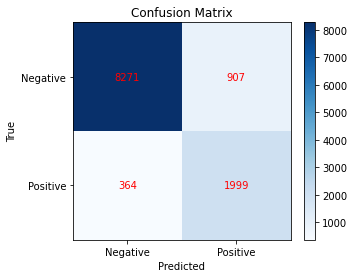

In [16]:
cm = confusion_matrix(df['label'], df['predicted_label'])
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.xticks([0,1], ['Negative', 'Positive'])
plt.yticks([0,1], ['Negative', 'Positive'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show()

In [17]:
# Word clouds for positive and negative reviews
pos_reviews = " ".join(df[df['label']==1]['review'])
neg_reviews = " ".join(df[df['label']==0]['review'])

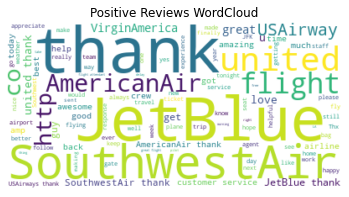

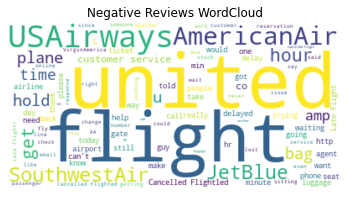

In [18]:
def plot_wordcloud(text, title):
    wc = WordCloud(stopwords=stop_words, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(6,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_wordcloud(pos_reviews, "Positive Reviews WordCloud")
plot_wordcloud(neg_reviews, "Negative Reviews WordCloud")

In [19]:

# =============================================
# Classical ML: TF-IDF + Logistic Regression
# =============================================
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['label'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
lr_preds = lr_model.predict(X_test_vec)

lr_accuracy = accuracy_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression F1 Score:", lr_f1)



Logistic Regression Accuracy: 0.9012559549588567
Logistic Regression F1 Score: 0.6935483870967742


In [20]:
from torch.utils.data import Dataset, DataLoader

In [21]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [34]:
X_train = X_train.sample(200, random_state=42).reset_index(drop=True)
y_train = y_train.loc[X_train.index].reset_index(drop=True)


In [35]:
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, return_tensors='pt', padding='max_length', truncation=True, max_length=128)
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


In [36]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
train_dataset = TextDataset(X_train, y_train, tokenizer)
test_dataset = TextDataset(X_test, y_test, tokenizer)


In [37]:
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [38]:
import torch


In [39]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
print(len(train_loader.dataset))  # total training samples


200


In [41]:
from tqdm import tqdm  # Add this at the top if not imported

# (Optional) Scheduler for learning rate decay
from transformers import get_scheduler
num_training_steps = len(train_loader) * 2  # 2 epochs
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# =============================================
# Training Loop
# =============================================
for epoch in range(2):
    print(f"\n===== Epoch {epoch+1} =====")
    model.train()
    total_loss = 0

    loop = tqdm(train_loader, desc="Training", leave=False)
    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()  # Optional: adjust LR each step

        total_loss += loss.item()
        loop.set_postfix(batch_loss=loss.item())

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1} Average Loss: {avg_loss:.4f}")



===== Epoch 1 =====


Epoch 1 Average Loss: 0.6013

===== Epoch 2 =====


Epoch 2 Average Loss: 0.4875


In [44]:
from tqdm import tqdm

model.eval()
test_loss = 0
predictions = []
true_labels = []

with torch.no_grad():
    loop = tqdm(test_loader, desc="Evaluating", leave=False)
    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        test_loss += loss.item()
        preds = torch.argmax(logits, dim=1)

        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

avg_test_loss = test_loss / len(test_loader)
bert_accuracy = accuracy_score(true_labels, predictions)
bert_f1 = f1_score(true_labels, predictions)

print(f"Epoch {epoch+1}, Test Loss: {avg_test_loss:.4f}, Accuracy: {bert_accuracy:.4f}, F1 Score: {bert_f1:.4f}")


Epoch 2, Test Loss: 0.4944, Accuracy: 0.8064, F1 Score: 0.0000
